# ANOVA: One Way ANOVA

### by

## Jeff Gross


based on SAS e-learning


### one-way ANOVA = two-sample t-test
### F statistic = t statistic^2

<img src="files/ANOVA_1.png">

<img src="files/ANOVA_2.png">

<img src="files/ANOVA_3.png">

### SSM+SSE=SST

#### SSM: variability explained by the type of medication (you want larger piece of total to be represented by what you can explain versus what you can't explain)
#### SSE: variability not explained by the type of medication

<img src="files/SS.png">

### Assumptions:

#### 1.Independent observations (do you have a good random sample?)
#### 2.error terms are normally distributed (are residuals normal?)
#### 3.error terms have equal variances across treatments (Levene's test: if p>.05 then fail to reject null hypothesis of equal variances)

### Task:  Are the average sales significantly different for 4 advertising types:  local newspaper ads, local radio ads, in-store salespeople, and in-store displays.

### Result:
#### BoxPlot: In-store display mean is lower than the others. In-store display has a positive outlier, and local radio has outliers in both directions.
#### Normality: The histogram and Q-Q plot both show that the residuals seem normally distributed.
#### Homogeneity of Variance: The Levene's Test for Homogeneity of Variance shows a p-value greater than alpha. Therefore, you do not reject the hypothesis of homogeneity of variances or equal variances across advertising types. The overall F-value from the analysis of variance table is associated with a p value less than or equal to .0001.
#### Conclusion:  At least one treatment mean is different from one other treatment mean. At this point, it is not known which means are significantly different.

In [2]:
libname statdata "/folders/myfolders/ECST131"; 
libname library "/folders/myfolders/ECST131";


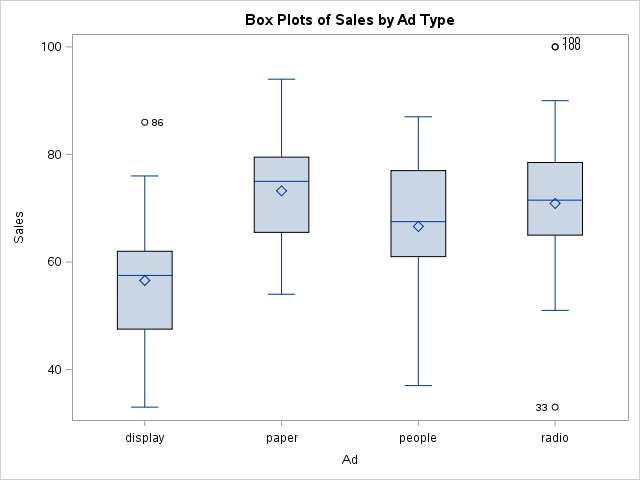
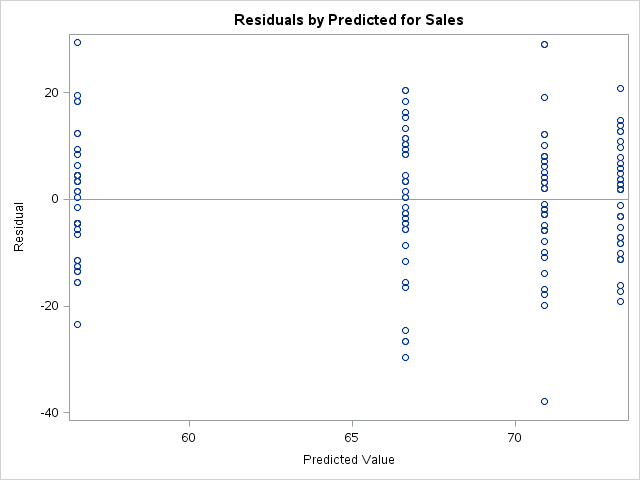
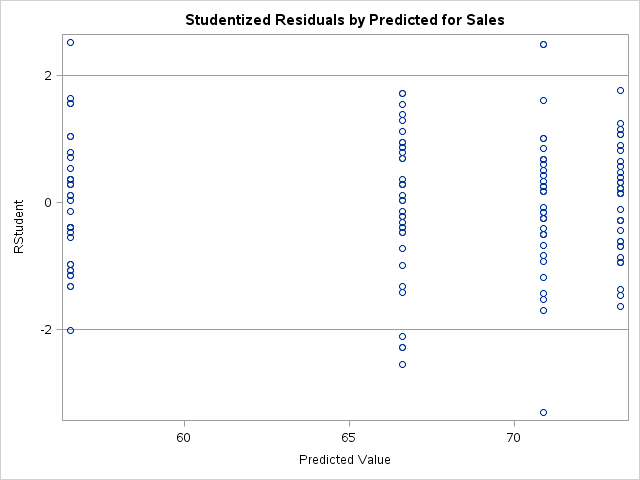
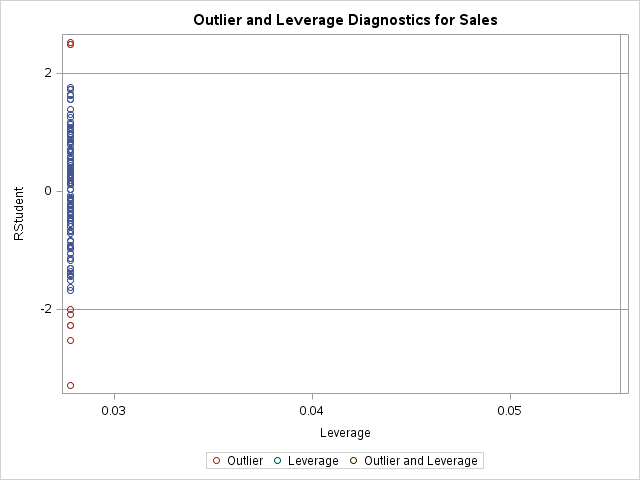
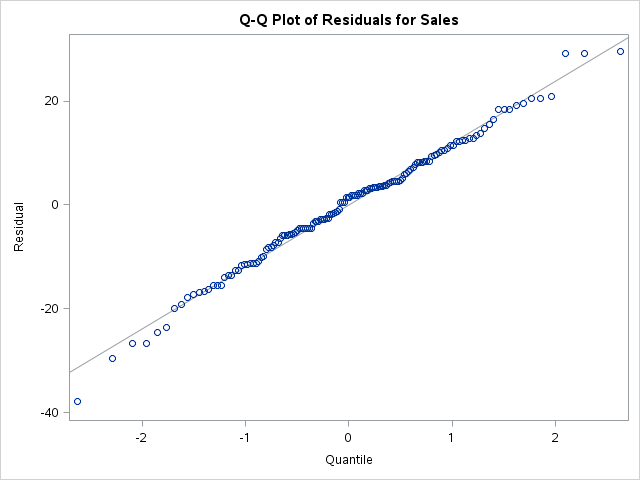
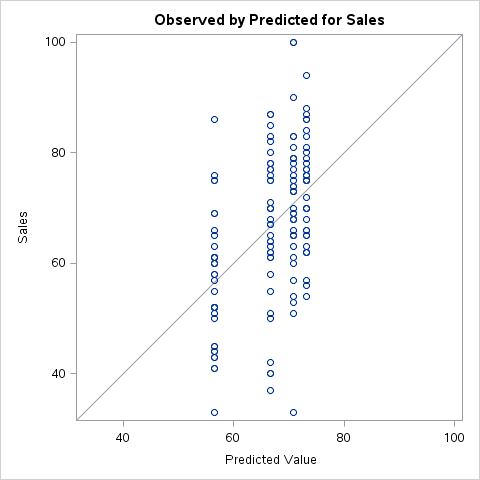
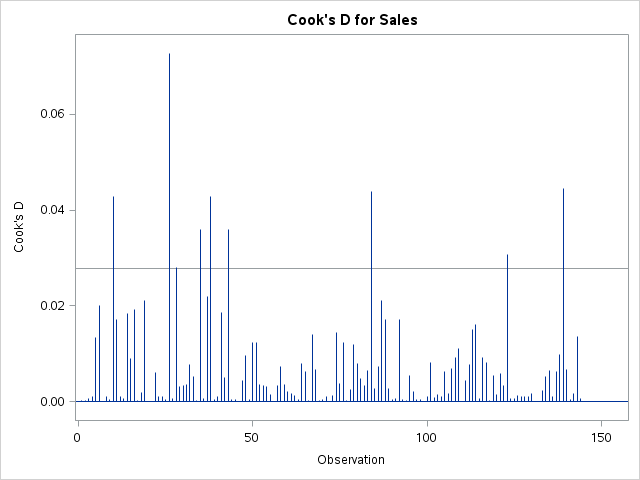
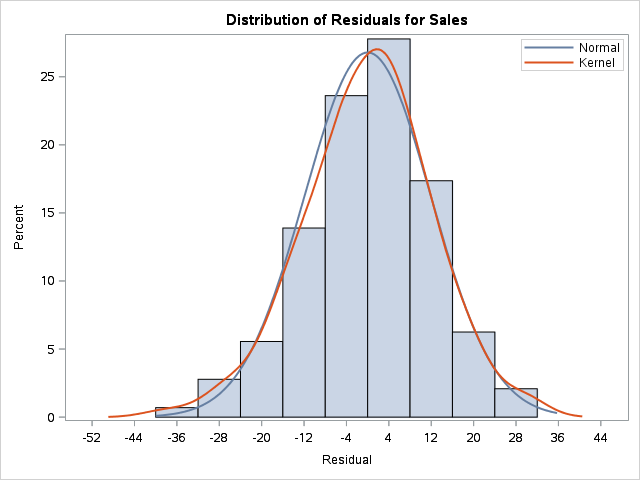
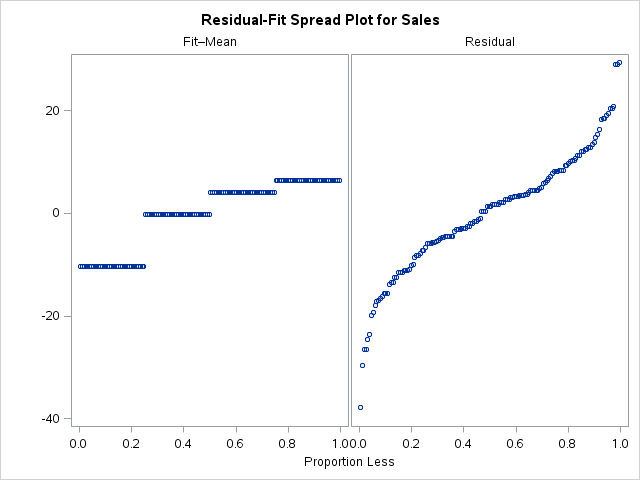

In [3]:
proc means data=statdata.ads printalltypes n mean 
           std skewness kurtosis;
   var Sales;
   class Ad;
   title 'Descriptive Statistics of Sales by Ad Type';
run;

proc sgplot data=statdata.ads;
   vbox Sales / category=Ad datalabel=Sales;
   title 'Box Plots of Sales by Ad Type';
run;
title;

proc glm data=statdata.ads plots(only)=diagnostics(unpack);
   class Ad;
   model Sales=Ad;
   means Ad / hovtest;
   title 'Testing for Equality of Ad Type on Sales';
run;
quit;
title;